José Geraldo Fernandes - 2022667276

Bibliotecas utilizadas:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

Implementação das funções de pertinência:

In [2]:
def trimf(x, a, b, c):
    mu = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] <= a:
            mu[i] = 0
        elif x[i] <= b:
            mu[i] = (x[i] - a) / (b - a)
        elif x[i] <= c:
            mu[i] = (c - x[i]) / (c - b)
        else:
            mu[i] = 0
    return mu

def trapmf(x, a, b, c, d):
    mu = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] <= a:
            mu[i] = 0
        elif x[i] <= b:
            mu[i] = (x[i] - a) / (b - a)
        elif x[i] <= c:
            mu[i] = 1
        elif x[i] <= d:
            mu[i] = (d - x[i]) / (d - c)
        else:
            mu[i] = 0
    return mu

def gaussmf(x, c, sigma):
    mu = np.exp(-1 / 2 * ((x - c) / sigma) ** 2)
    return mu

def gbellmf(x, a, b, c):
    mu = 1 / (1 + abs((x - c) / a) ** (2 * b))
    return mu

def sigmf(x, a, c):
    mu = 1 / (1 + np.exp(-a * (x - c)))
    return mu

# Complemento Nebuloso

Implementação das funções de complemento:

In [3]:
def zadeh(a):
    return 1 - a

def yager(a, w):
    return (1 - a ** w) ** (1 / w)

def sugeno(a, s):
    return (1 - a) / (1 + s * a)

Parâmetros:

In [4]:
li = 0
ls = 10
delta = 0.1
N = int((ls - li) / delta + 1)

Pertinência:

In [5]:
x = np.linspace(li, ls, N)
mu = gaussmf(x, c = 5, sigma = 2)
mu_zadeh = zadeh(mu)
mu_yager = yager(mu, w = 3)
mu_sugeno = sugeno(mu, s = 2)

Plot, complementos em relação ao "x":

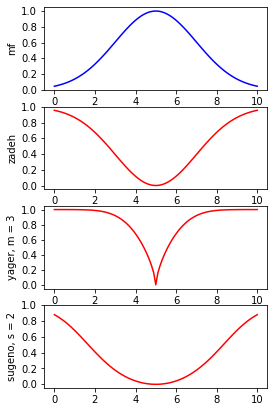

In [6]:
fig, axs = plt.subplots(4, figsize = (4, 7))
axs[0].plot(x, mu, color='b')
axs[0].set_ylabel('mf')
axs[1].plot(x, mu_zadeh, color='r')
axs[1].set_ylabel('zadeh')
axs[2].plot(x, mu_yager, color='r')
axs[2].set_ylabel('yager, m = 3')
axs[3].plot(x, mu_sugeno, color='r')
axs[3].set_ylabel('sugeno, s = 2')
plt.setp(axs, xticks=np.linspace(start = li, stop = ls, num = 6), 
         yticks=np.linspace(start = 0, stop = 1, num = 6));

Superfície:

In [7]:
x = np.linspace(0, 1, N)
x_zadeh = zadeh(x)
x_yager1 = yager(x, w = 3)
x_yager2 = yager(x, w = 1)
x_yager3 = yager(x, w = 0.7)
x_sugeno1 = sugeno(x, s = -0.7)
x_sugeno2 = sugeno(x, s = 0)
x_sugeno3 = sugeno(x, s = 20)

Plot, complementos em relação à função:

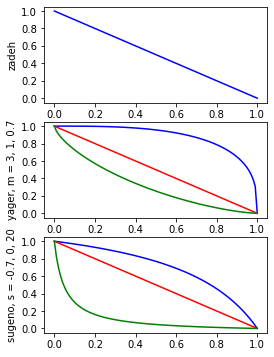

In [8]:
fig, axs = plt.subplots(3, figsize = (4, 6))
axs[0].plot(x, x_zadeh, color='b')
axs[0].set_ylabel('zadeh')
axs[1].plot(x, x_yager1, color='b')
axs[1].plot(x, x_yager2, color='r')
axs[1].plot(x, x_yager3, color='g')
axs[1].set_ylabel('yager, m = 3, 1, 0.7')
axs[2].plot(x, x_sugeno1, color='b')
axs[2].plot(x, x_sugeno2, color='r')
axs[2].plot(x, x_sugeno3, color='g')
axs[2].set_ylabel('sugeno, s = -0.7, 0, 20')
plt.setp(axs, xticks=np.linspace(start = 0, stop = 1, num = 6), 
         yticks=np.linspace(start = 0, stop = 1, num = 6));

# União Nebulosa

Implementação das funções de união:

In [9]:
def maximo(a, b):
    return np.maximum(a, b)

def probabilistica(a, b):
    return a + b - a * b

def limitada(a, b):
    return np.minimum(1, a + b)

def drastica(a, b):
    mu = np.ones(shape = a.shape)
    azero = (a == 0)    
    bzero = (b == 0)
    mu[azero] = b[azero]
    mu[bzero] = a[bzero]
    
    return mu

Pertinência:

In [10]:
x = np.linspace(li, ls, N)
mu1 = trimf(x, a = 2, b = 3, c = 5)
mu2 = trimf(x, a = 4, b = 5, c = 9)
mu_maximo = maximo(mu1, mu2)
mu_probabilistica = probabilistica(mu1, mu2)
mu_limitada = limitada(mu1, mu2)
mu_drastica = drastica(mu1, mu2)

Plot, união em relação ao "x":

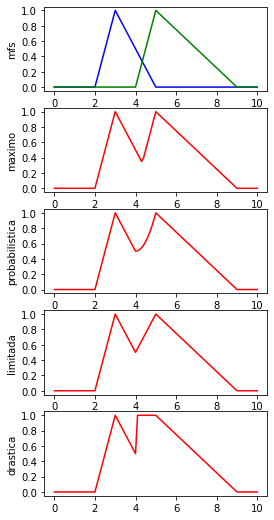

In [11]:
fig, axs = plt.subplots(5, figsize = (4, 9))
axs[0].plot(x, mu1, color='b')
axs[0].plot(x, mu2, color='g')
axs[0].set_ylabel('mfs')
axs[1].plot(x, mu_maximo, color='r')
axs[1].set_ylabel('maximo')
axs[2].plot(x, mu_probabilistica, color='r')
axs[2].set_ylabel('probabilistica')
axs[3].plot(x, mu_limitada, color='r')
axs[3].set_ylabel('limitada')
axs[4].plot(x, mu_drastica, color='r')
axs[4].set_ylabel('drastica')

plt.setp(axs, xticks=np.linspace(start = li, stop = ls, num = 6), 
         yticks=np.linspace(start = 0, stop = 1, num = 6));

Superfície:

In [12]:
a = np.linspace(0, 1, N)
b = np.linspace(0, 1, N)
A, B = np.meshgrid(a, b)
surf_maximo = maximo(A, B)
surf_probabilistica = probabilistica(A, B)
surf_limitada = limitada(A, B)
surf_drastica = drastica(A, B)

Plot, união em relação às pertinências:

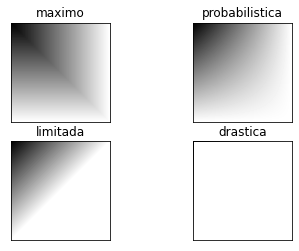

In [13]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(surf_maximo, cmap = 'gray')
axs[0, 0].set_title('maximo')
axs[0, 0].axes.get_xaxis().set_visible(False)
axs[0, 0].axes.get_yaxis().set_visible(False)

axs[0, 1].imshow(surf_probabilistica, cmap = 'gray')
axs[0, 1].set_title('probabilistica')
axs[0, 1].axes.get_xaxis().set_visible(False)
axs[0, 1].axes.get_yaxis().set_visible(False)

axs[1, 0].imshow(surf_limitada, cmap = 'gray')
axs[1, 0].set_title('limitada')
axs[1, 0].axes.get_xaxis().set_visible(False)
axs[1, 0].axes.get_yaxis().set_visible(False)

axs[1, 1].imshow(surf_drastica, cmap = 'gray')
axs[1, 1].set_title('drastica')
axs[1, 1].axes.get_xaxis().set_visible(False)
axs[1, 1].axes.get_yaxis().set_visible(False)

# Interseção Nebulosa

Implementação das funções de interseção:

In [14]:
def minimo(a, b):
    return np.minimum(a, b)

def algebrico(a, b):
    return a * b

def limitado(a, b):
    return np.maximum(0, a + b - 1)

def drastico(a, b):
    mu = np.zeros(shape = a.shape)
    aum = (a == 1)
    bum = (b == 1)
    mu[aum] = b[aum]
    mu[bum] = a[bum]
    
    return mu

Pertinência:

In [15]:
x = np.linspace(li, ls, N)
mu1 = trapmf(x, a = 2, b = 3, c = 6, d = 7)
mu2 = sigmf(x, a = 2, c = 6)
mu_minimo = minimo(mu1, mu2)
mu_algebrico = algebrico(mu1, mu2)
mu_limitado = limitado(mu1, mu2)
mu_drastico = drastico(mu1, mu2)

Plot, interseção em relação ao "x":

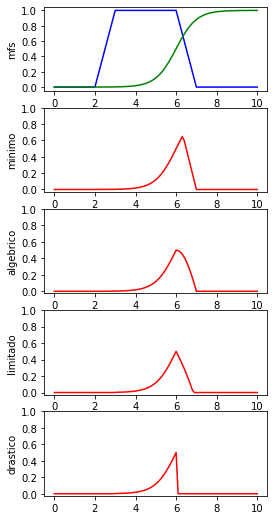

In [16]:
fig, axs = plt.subplots(5, figsize = (4, 9))
axs[0].plot(x, mu1, color='b')
axs[0].plot(x, mu2, color='g')
axs[0].set_ylabel('mfs')
axs[1].plot(x, mu_minimo, color='r')
axs[1].set_ylabel('minimo')
axs[2].plot(x, mu_algebrico, color='r')
axs[2].set_ylabel('algebrico')
axs[3].plot(x, mu_limitado, color='r')
axs[3].set_ylabel('limitado')
axs[4].plot(x, mu_drastico, color='r')
axs[4].set_ylabel('drastico')

plt.setp(axs, xticks=np.linspace(start = li, stop = ls, num = 6), 
          yticks=np.linspace(start = 0, stop = 1, num = 6));

Superfície:

In [17]:
a = np.linspace(0, 1, N)
b = np.linspace(0, 1, N)
A, B = np.meshgrid(a, b)
surf_maximo = minimo(A, B)
surf_algebrico = algebrico(A, B)
surf_limitado = limitado(A, B)
surf_drastico = drastico(A, B)

Plot, interseção em relação às pertinências:

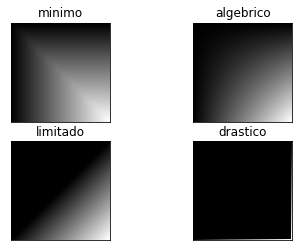

In [18]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(surf_maximo, cmap = 'gray')
axs[0, 0].set_title('minimo')
axs[0, 0].axes.get_xaxis().set_visible(False)
axs[0, 0].axes.get_yaxis().set_visible(False)

axs[0, 1].imshow(surf_algebrico, cmap = 'gray')
axs[0, 1].set_title('algebrico')
axs[0, 1].axes.get_xaxis().set_visible(False)
axs[0, 1].axes.get_yaxis().set_visible(False)

axs[1, 0].imshow(surf_limitado, cmap = 'gray')
axs[1, 0].set_title('limitado')
axs[1, 0].axes.get_xaxis().set_visible(False)
axs[1, 0].axes.get_yaxis().set_visible(False)

axs[1, 1].imshow(surf_drastico, cmap = 'gray')
axs[1, 1].set_title('drastico')
axs[1, 1].axes.get_xaxis().set_visible(False)
axs[1, 1].axes.get_yaxis().set_visible(False)